In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
data = pd.read_csv("data/Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [122]:
data.shape

(400, 5)

In [123]:
data = data.iloc[:,2:]
X = data.drop("Purchased", axis=1)
y = data["Purchased"]

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# STANDARDIZATION - StandardScaler

In [125]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)   #scaler learns the mean and deviation values from X_train

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)     # But we transform both the train and test set to avoid scaling issues in test set

In [126]:
scaler.mean_  # Age mean = 3.78...    Salary Mean = 6.98.... 

array([3.7818750e+01, 7.0565625e+04])

In [127]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

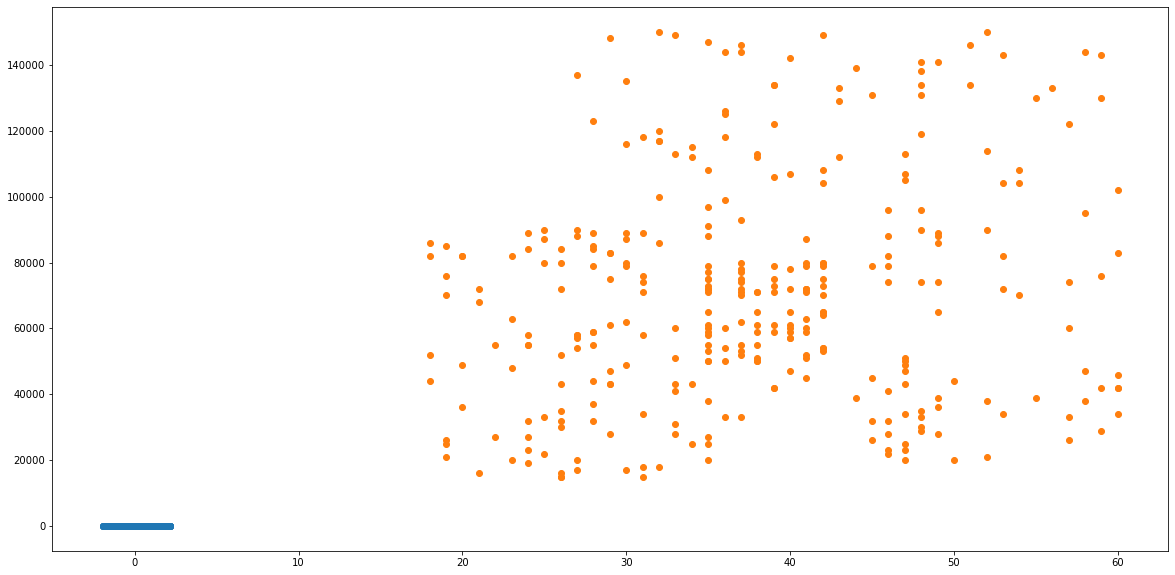

In [128]:
plt.figure(figsize=(20,10))
plt.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"])
plt.scatter(X_train["Age"], X_train["EstimatedSalary"])

In [129]:
np.round(X_train.describe(),1) #mean of unscaled data = (37.8 , 69843.8)......... std of unscaled data = (10.5 , 34566.8)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.8,70565.6
std,10.3,34499.7
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,70000.0
75%,46.0,88000.0
max,60.0,150000.0


In [130]:
np.round(X_train_scaled.describe()) #mean of scaled data = (0 , 0)......... std of unscaled data = (1 , 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,2.0


Text(0.5, 1.0, 'After Scaling')

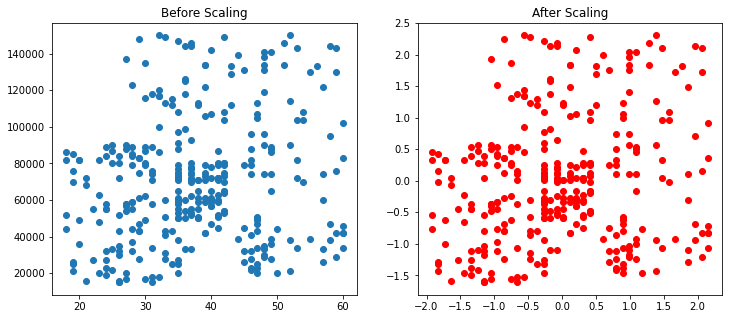

In [131]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color='red')
ax2.set_title("After Scaling")

# LogisticRegression


*  HAS ADVERSE EFFECT ON ALGORITHMS USING GRADIENT DESCENT OR EUCLIDEAN DISTANCE

In [132]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [133]:
from sklearn.metrics import accuracy_score, classification_report

In [134]:
lr_acc = accuracy_score(y_test, y_pred)
lr_acc_scaled = accuracy_score(y_test, y_pred_scaled)
lr_acc, lr_acc_scaled

(0.65, 0.85)

In [135]:
print("Actual unscaled Score ",lr_acc)
print("Scaled Score ",lr_acc_scaled) #IMPROVEMENT IN ACCURACY

Actual unscaled Score  0.65
Scaled Score  0.85


# DecisionTree
* DOESNT HAVE ANY EFFECT OF ALGORITHMS NOT USING GD or EUCLIDEAN DISTANCE

In [136]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [137]:
dt_acc = accuracy_score(y_test, y_pred)
dt_acc_scaled = accuracy_score(y_test, y_pred_scaled)

In [138]:
print("Actual Unscaled Score", dt_acc)
print("Scaled Score", dt_acc_scaled) #NO IMPROVEMENT IN ACCURACY 

Actual Unscaled Score 0.8875
Scaled Score 0.8875


# EFFECT OF OUTLIERS 

In [139]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [140]:
feat = pd.DataFrame({ 'Age': [5,90,105],
                      'EstimatedSalary': [1000,250000,300000],
                      'Purchased': [0,1,1]})
data = data.append(feat)

In [141]:
data.tail(5).reset_index(drop=True)

,Age,EstimatedSalary,Purchased
0,36,33000,0
1,49,36000,1
2,5,1000,0
3,90,250000,1
4,105,300000,1


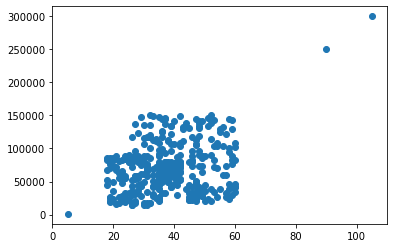

In [142]:
plt.scatter(data["Age"],data["EstimatedSalary"])

In [143]:
X=data.drop("Purchased", axis=1)
y=data["Purchased"]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [145]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [146]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Text(0.5, 1.0, 'After Scaling')

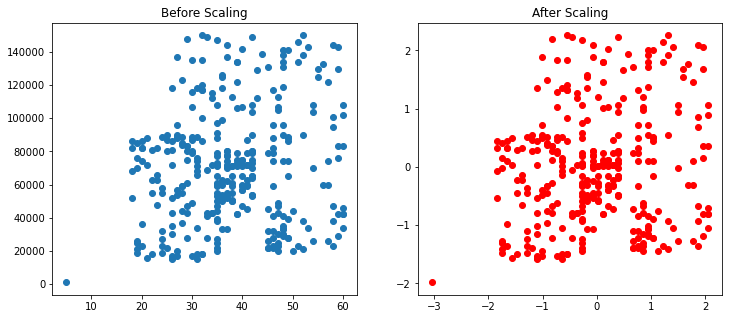

In [147]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train["Age"],X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Age"],X_train_scaled["EstimatedSalary"], color="red")
ax2.set_title("After Scaling")

In [148]:
data = pd.read_csv("data/wine.csv",header = None, usecols=[1,2,3])
data.columns=["Class label","Alcohol","Malic Acid"]
data.head()

,Class label,Alcohol,Malic Acid
0,0,1.00,2.00
1,1,14.23,1.71
2,1,13.20,1.78
3,1,13.16,2.36
4,1,14.37,1.95


In [149]:
X = data.drop("Class label",axis=1)
y = data["Class label"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [150]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_train_scaled)

C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [151]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

Text(0.5, 1.0, 'After Scaling')

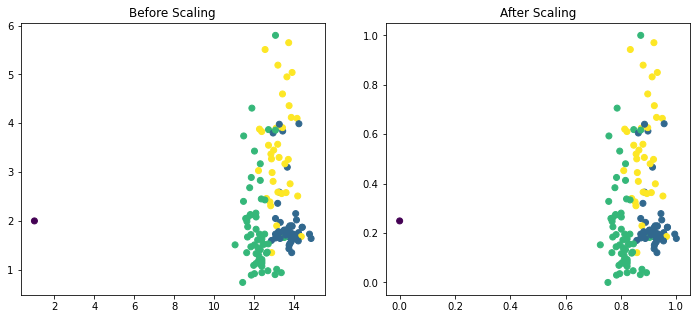

In [156]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train["Alcohol"],X_train["Malic Acid"], c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Alcohol"],X_train_scaled["Malic Acid"],c=y_train)
ax2.set_title("After Scaling")